In [20]:
# Import necessary libraries for data manipulation, machine learning, and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
def hot_encode_columns(original_df, columns):
    """
    Function to apply one-hot encoding to specified columns in the DataFrame.
    
    Args:
        original_df (DataFrame): The original pandas DataFrame.
        columns (list): List of column names to be one-hot encoded.
    
    Returns:
        DataFrame: A DataFrame with specified columns one-hot encoded and original columns dropped.
    """
    # Create a copy of the DataFrame to avoid modifying the original data.
    original_df = original_df.copy()
    
    # Print columns to be encoded for verification.
    print([*columns])
    
    # Apply one-hot encoding to the specified columns.
    encoded_df = pd.get_dummies(original_df.loc[:, columns])
    
    # Drop the original columns after encoding.
    original_df.drop(columns, axis=1, inplace=True)
    
    # Concatenate the original DataFrame with the encoded DataFrame.
    return pd.concat([original_df, encoded_df], axis=1)

In [22]:
def show_missing_values(df: pd.DataFrame):
    """
    Function to visualize missing values in each column of a DataFrame.
    
    Args:
        df (DataFrame): The DataFrame to be visualized for missing values.
    """
    # Setup plot size.
    fig, ax = plt.subplots(figsize=(20, 6))
    
    # Create a heatmap to visualize the missing values in the DataFrame.
    sns.heatmap(df.isnull(), cbar=False, ax=ax)
    
    # Display the plot.
    plt.show()

In [23]:
# Load train and test datasets.
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')


In [24]:
# Apply one-hot encoding to 'Sex' and 'Embarked' columns.
train_df = hot_encode_columns(train_df, ['Sex', 'Embarked'])
test_df = hot_encode_columns(test_df, ['Sex', 'Embarked'])


['Sex', 'Embarked']
['Sex', 'Embarked']


In [25]:
# Display first few rows of the train DataFrame to verify changes.
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [26]:
# Drop unnecessary columns from train and test DataFrames.
train_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)


In [27]:
# Display statistical summary of numerical columns in train DataFrame.
train_df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


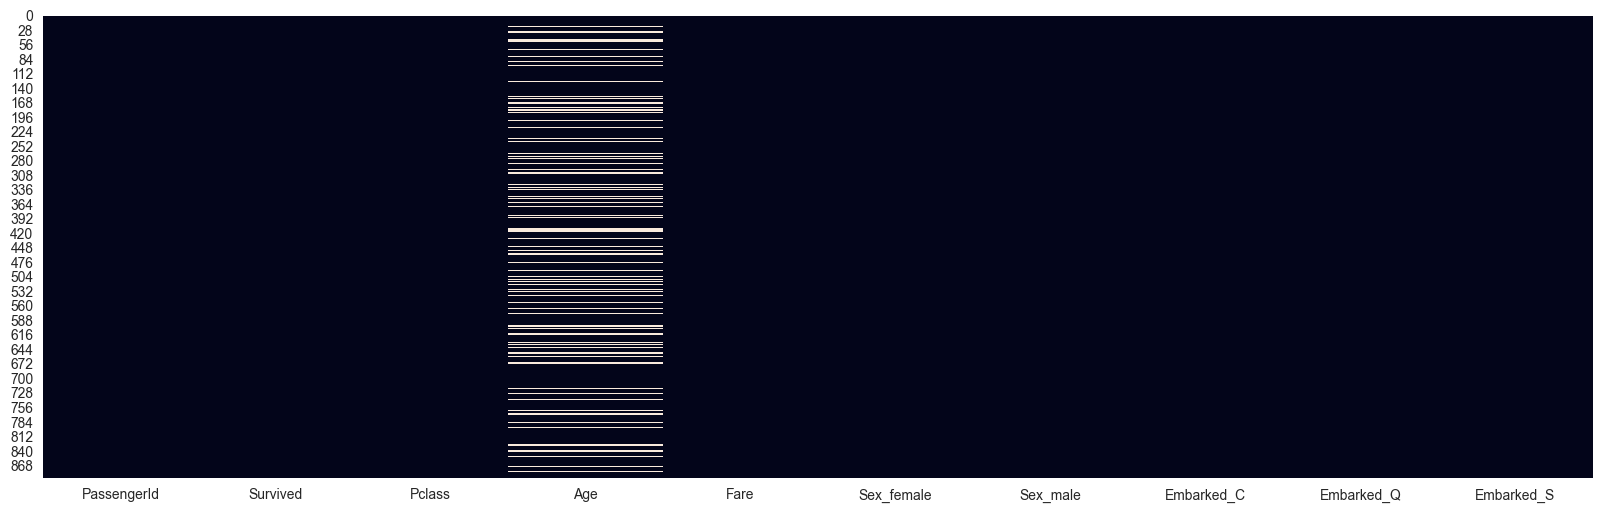

In [28]:
# Visualize missing values in train DataFrame before imputation.
show_missing_values(train_df)

In [29]:
def fill_missing_data_with_mice_imputer(df: pd.DataFrame):
    """
    Impute missing values using MICE technique with a Bayesian Ridge estimator.
    
    Args:
        df (DataFrame): The DataFrame with missing values to impute.
    
    Returns:
        DataFrame: A DataFrame with missing values imputed.
    """
    # Create a copy of the DataFrame to preserve original data.
    mice_imputer_df = df.copy()
    
    # Initialize the MICE imputer with Bayesian Ridge estimator.
    mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
    
    # Perform the imputation and return the imputed DataFrame.
    df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(mice_imputer_df), columns=mice_imputer_df.columns)
    return df_mice_imputed

In [30]:
# Impute missing values in train and test DataFrames.
train_df = fill_missing_data_with_mice_imputer(train_df)
test_df = fill_missing_data_with_mice_imputer(test_df)


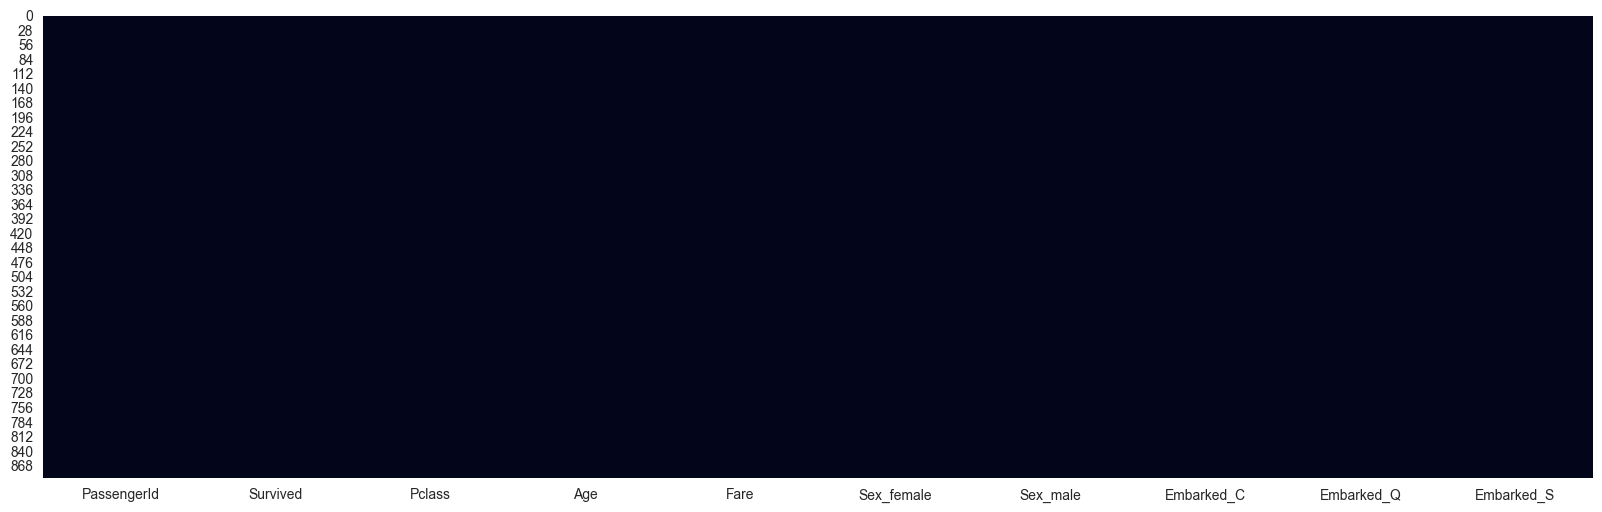

In [31]:
# Visualize missing values in the train DataFrame after imputation to ensure all missing data has been addressed.
show_missing_values(train_df)


In [32]:
# Extract features and target variable for model training.
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']


In [33]:
test_df= fill_missing_data_with_mice_imputer(test_df)

In [34]:
# Split the training data further into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [35]:

# Initialize and train a RandomForestClassifier.
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

# Predict survival on the test set.
y_pred = model.predict(X_test)




In [36]:
# Calculate the accuracy of the model on the test set and print it.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8268156424581006


In [37]:
### Save submissions
# Prepare submission DataFrame using predictions from the model on the test dataset.
submissions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': model.predict(test_df)})
submissions_df['PassengerId'] = submissions_df['PassengerId'].astype('int32')
submissions_df['Survived'] = submissions_df['Survived'].astype('int32')

# Display the structure of the submissions DataFrame to verify correctness.
submissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int32
dtypes: int32(2)
memory usage: 3.4 KB


In [38]:
# Save the predictions to a CSV file for submission.
submissions_df.to_csv('./submissions/submission_2.csv', index=False)

### Conclusion for the Second Approach Using RandomForest with MICE Imputation

This script demonstrates an organized way to preparing and analyzing the Titanic dataset for a survival prediction problem with a machine learning model. Here are the main components and logic for this methodology:

1. **Data Loading**: The script begins by loading the training and testing data, which are required for all data analysis and machine learning operations.


2. **One-Hot Encoding**: To handle categorical variables ('Sex' and 'Embarked'), the script use one-hot encoding. This translation is required because many machine learning algorithms perform better or require categorical information to be transformed into numerical representation.


3. **Data Cleaning**: Unnecessary columns 'Ticket', 'Cabin', 'Name', 'SibSp', and 'Parch' are removed. These columns are either excessively sparse, contain too many unique values, or are not directly important to survival prediction, potentially reducing model performance owing to the curse of dimensionality or introducing noise.

4. **Missing Data Handling**: To address missing values in both the training and testing datasets, the script uses the MICE (Multiple Imputation by Chained Equations) approach with a Bayesian Ridge estimator. This method is preferred over simpler imputation methods (such as mean or median imputation) because it provides a more robust approach to estimating missing values by modeling each feature with missing values as a function of other characteristics in a round-robin fashion.

5. **Visualization of Missing Values**: The script visualizes missing values both before and after imputation to ensure that the selected imputation technique is effective.


6. **Model Training**: A RandomForestClassifier is trained on the preprocessed data. RandomForest is an excellent choice for this assignment because of its ability to handle imbalanced datasets, resilience to outliers, and performance in classification tasks.

7. **Model Evaluation**: The model's performance is assessed using accuracy as a measure. The goal variable (survival) is binary, thus accuracy is suitable here.

8. **Prediction and Submission**: Finally, the script applies the trained model to predict survival on the previously unknown test dataset. The predictions are packaged into a submission-ready DataFrame, with data types that correspond to the expected submission criteria (integers for IDs and survival forecasts).


9. **Results Saving**: The predictions are stored to a CSV file, which may then be submitted to a Kaggle scoring platform.

Overall, this method methodically handles the issues of missing data and categorical feature encoding, applies a strong classifier, and guarantees that the result is suitable for submission. This methodological rigor enhances the chance of accurate and reproducible survival forecasts on the Titanic dataset.
